# **Automatic Language Recognition**
MultiLingual Text Classification

**Loading the Data**

https://www.kaggle.com/zarajamshaid/language-identification-datasst

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

In [2]:
dataSet = pd.read_csv('/content/dataset.csv')

print('Data shape (rows, cols): ', dataSet.shape)
dataSet

Data shape (rows, cols):  (22000, 2)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


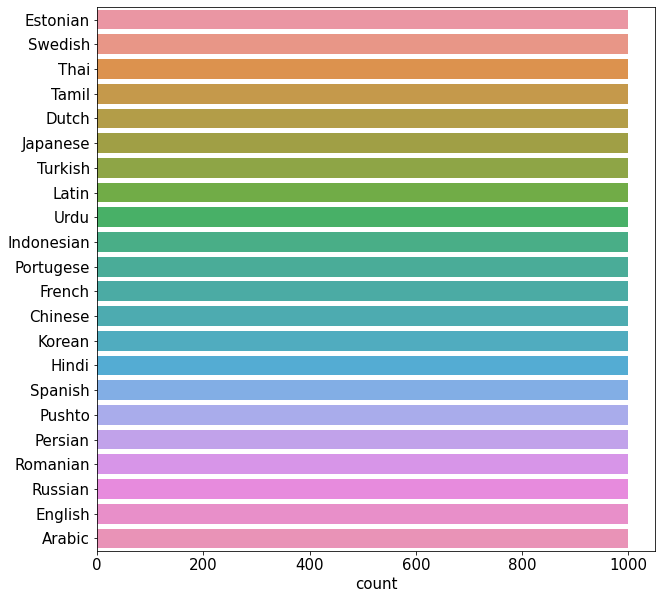

In [4]:
plt.figure(figsize=(10, 10))
font = {'weight': 'normal','size': 15}
plt.rc('font', **font)
plt.xlabel('Sentiment')
sns.countplot(y = dataSet['language'].values)
plt.show()

**Importing NLTK Library**

In [5]:
import nltk

In [6]:
X = dataSet['Text']
y = dataSet['language'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
le.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Features Extraction**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=30000, ngram_range=(1, 1))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [10]:
X_train.shape

(17600, 30000)

In [11]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(cm, le.classes_, le.classes_)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('\n')

  plt.figure(figsize=(15, 15))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 15}).set_title('Confusion Matrix')
  plt.show()

## Training The Model Using GaussianNB

In [12]:
acc = {}

Accuracy:	0.9420454545454545




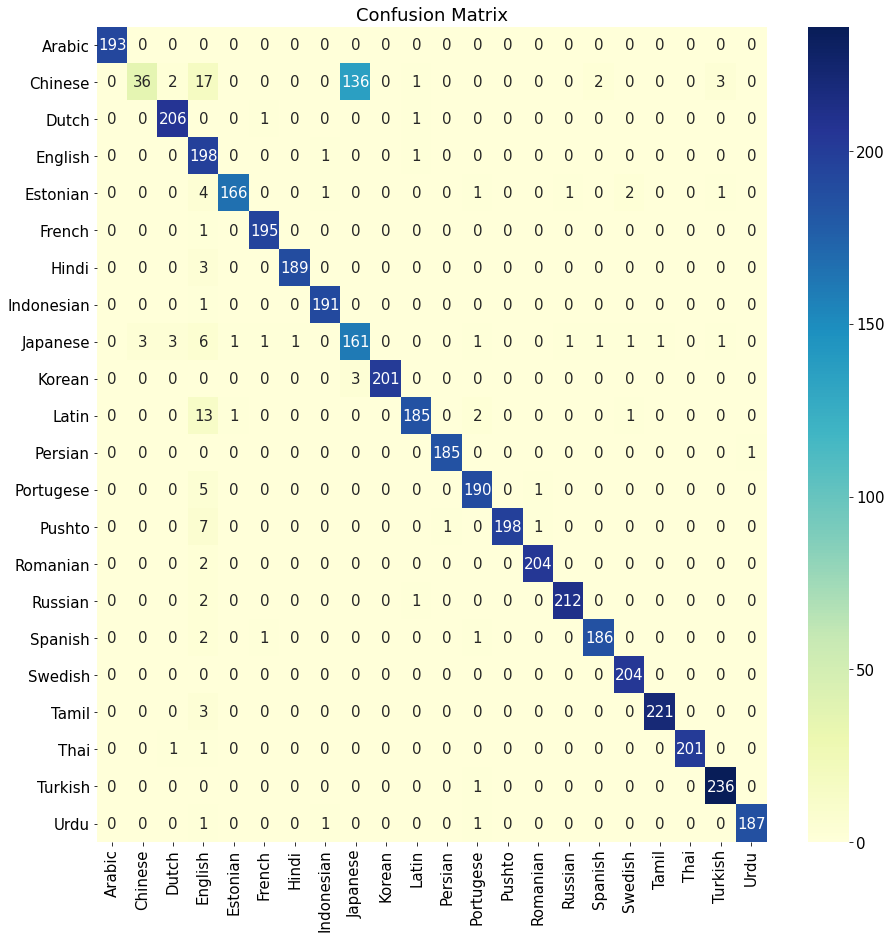

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['GaussianNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using BernoulliNB

Accuracy:	0.9540909090909091




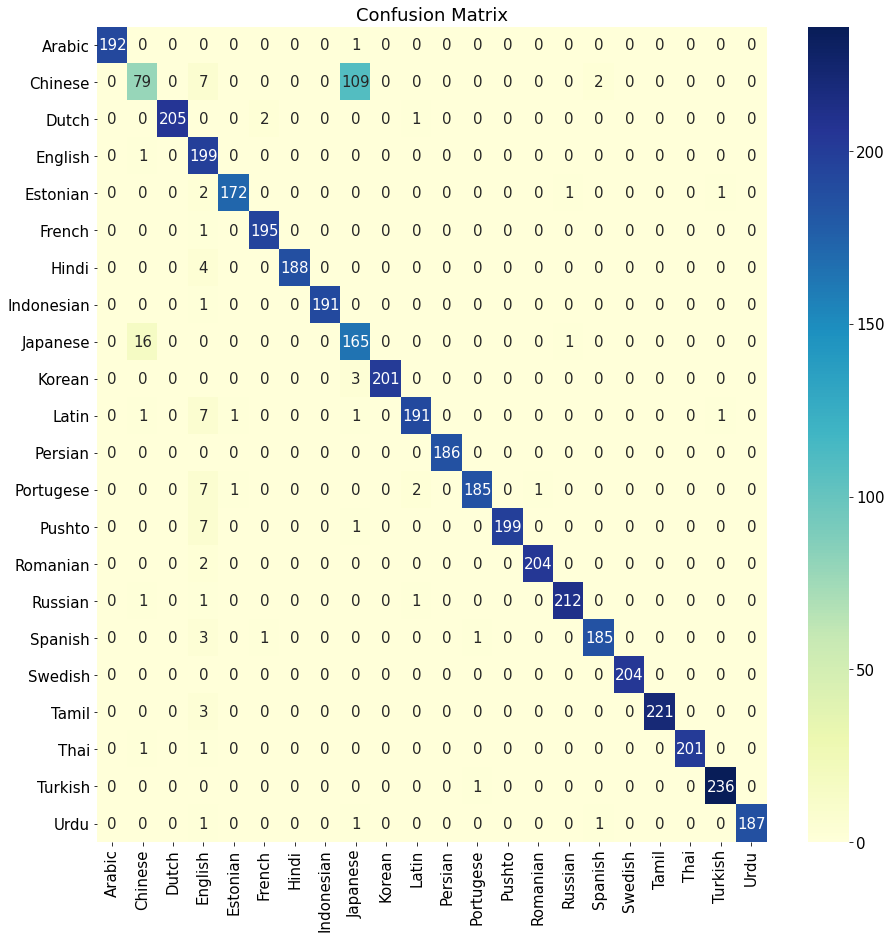

In [14]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=1e-4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.9343181818181818




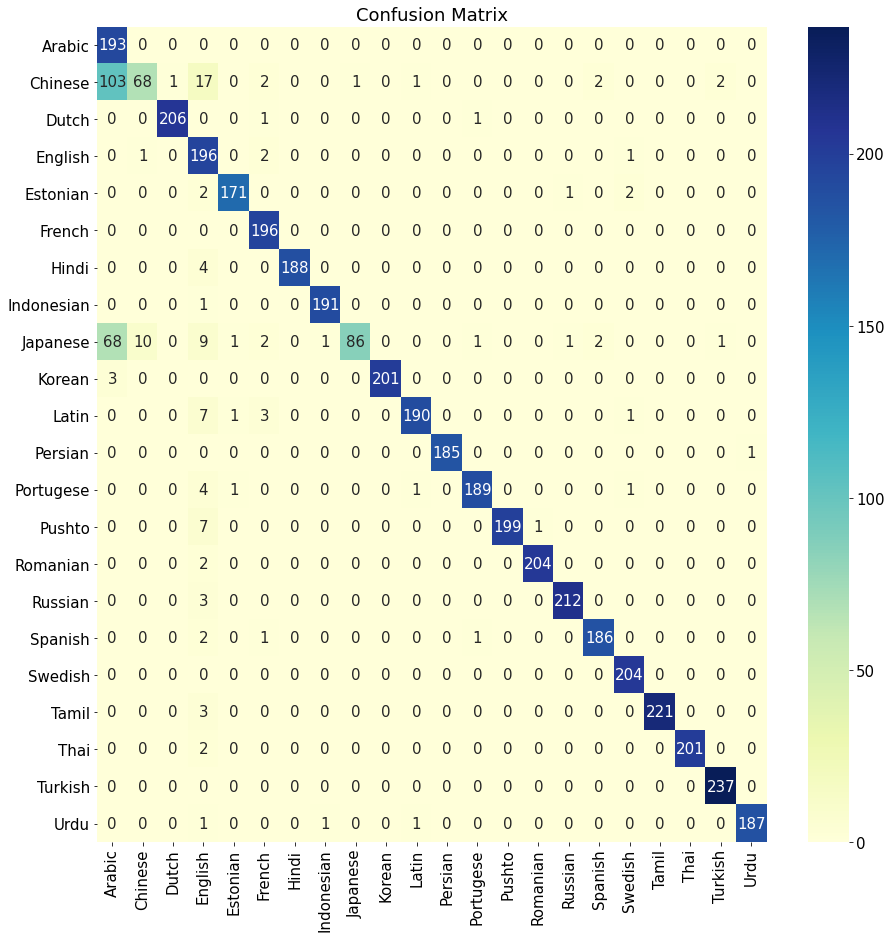

In [15]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=1e-6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.9347727272727273




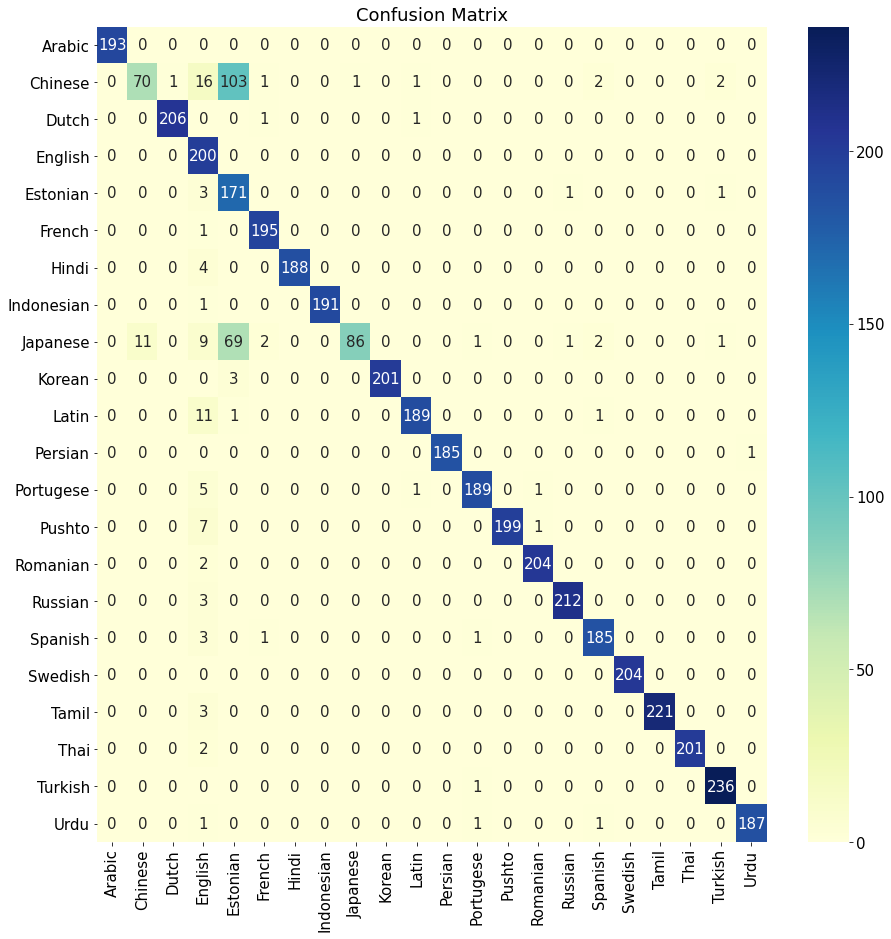

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.9638636363636364




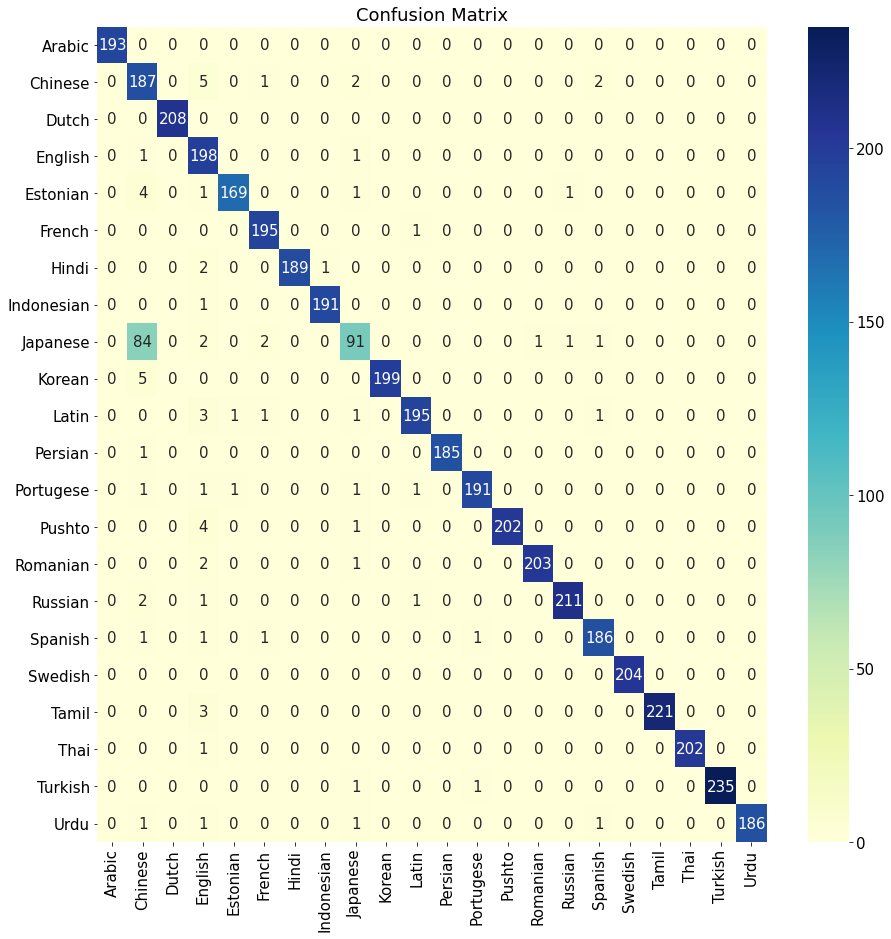

In [17]:
from sklearn.svm import LinearSVC

model = LinearSVC(C = 3, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

##Training The Model Using SGDClassifier

Accuracy:	0.9609090909090909




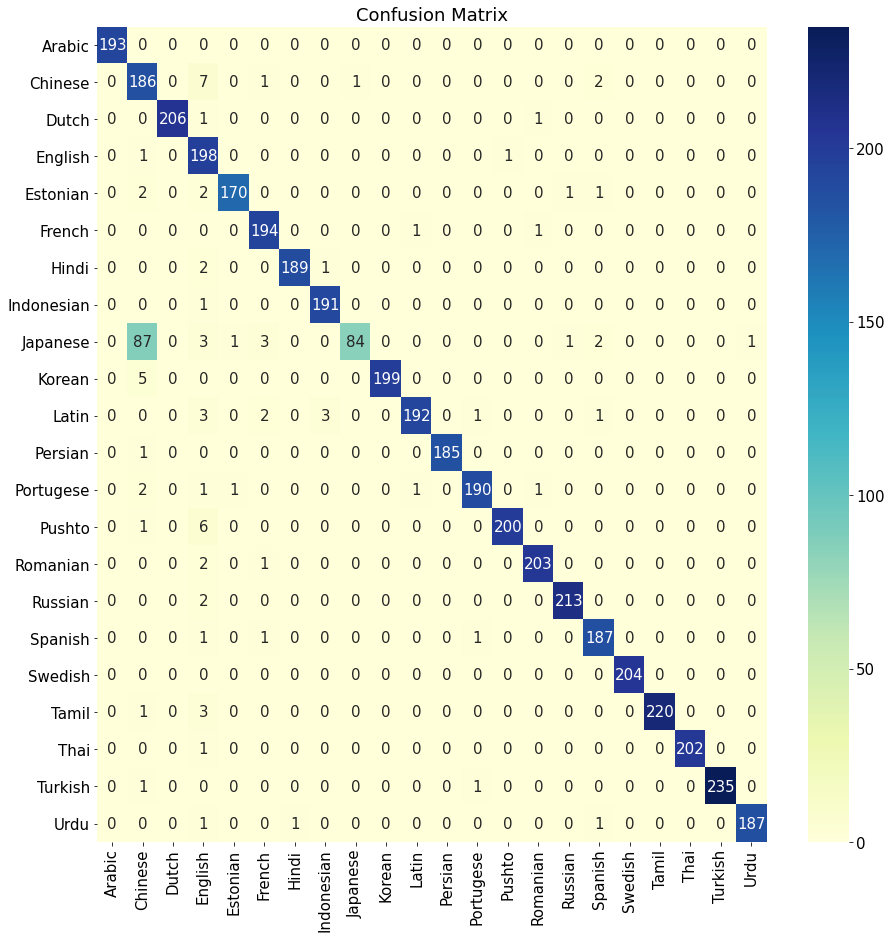

In [18]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state = 0, alpha=1e-10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SGDClassifier'] = accuracy_score(y_test, y_pred)

In [19]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
LinearSVC,0.963864
SGDClassifier,0.960909
BernoulliNB,0.954091
GaussianNB,0.942045
MultinomialNB,0.934773
ComplementNB,0.934318
